<h1><center>Data Science Research </center></h1>


<h2><center>Abstract</center></h2>

This report refers to the main challenges in physical activity monitoring. The differences of classification problems will be applied to give an insight on the expected outcomes of wearable software’s/devices. The benchmark datasets of 9 different subjects that have committed over 12 activities will be used to investigate the correlations and arise with possible results which will grant some insights

## 1 Introduction

Wearable devices are becoming more and more famous in improving our daily physical activities, they can be used to estimate the intensity along with duration of the performed activity which can be used to limits of our bodies. Wearable devices such as fitness trackers can monitor the physiological data and behavior, these devices boost self-awareness and encourage behavior changes in simple habits that can improve our daily activities.

For this assignment, we will try to discover the possibilities of such devices by testing the potential of PAMAP2 Physical Activity Monitoring Data-Set, this data set involves over 12 activities that were performed by 9 different participants, all the participants were wearing 3 different Internal Measurement Units(IMU) sensors.


## 2 PAMAP Data-set and IMU

As mentioned before the PAMAP2 dataset consists data of over 12 different activities, such activities are as followed.
* lying
* sitting
* standing
* walking
* running
* cycling
* Nordic walking
* watching TV
* computer work
* car driving
* ascending stairs
* descending stairs
* vacuum cleaning
* ironing
* folding laundry
* house cleaning
* playing soccer
* rope jumping
* other (transient activities)

Each participant had to follow a protocol to make the data persistent, that is, follow the time duration given for each activity, the 12 activities were followed as stated in the protocol, however, there were 6 extra activities  that were optional but were still performed by 5 participants.

All the activities  were performed by using IMU sensors.

### 2.1 Internal Measurement Unit (IMU)

Analog devices such as Internal Measurement Unit (IMU) sensors, are example of devices that fit for measuring or maintaining orientation and angular velocity(gyroscopes). the sensors in them allow to identify the accelerations, manometers and pressure[1].[1]. 

For the sake of the data gathering, all the activities outlined above were performed by participants  that wore 3 of such sensors upon their bodies, 1 - was placed on a chest, 2 - was placed on the hand wirst, 3 - on a ankle.
<center>The example of the body shape participant  wearing IMU sensors</center>

<img src="https://scontent-lht6-1.xx.fbcdn.net/v/t1.0-9/82241711_2709359825813214_797297456583802880_n.jpg?_nc_cat=100&_nc_ohc=MjSDyHJRjHoAQlqtlxwDB8YCaq-ENdYjJV-xj1Q5tZYaDOI9pjqiBmAXg&_nc_ht=scontent-lht6-1.xx&oh=d5b6712a1fbb3b5c168c4a02397cf2f8&oe=5EA77234" width="200" height="200" />

Each of the data-files contains 54 columns per row, the columns contain the following data:
* 1 timestamp (s)
* 2 activityID (see II.2. for the mapping to the activities)
* 3 heart rate (bpm)
* 4-20 IMU hand
* 21-37 IMU chest
* 38-54 IMU ankle


## 3 Data Loading and Labeling

As mentioned, the data includes 54 artributes, to produce our analyses, all this dataset should be loaded, cleaned and labeled as it will fit our tests.

The data is labeled in columns that have no names and include only numerical data, each column is represented according to [1]. Although, each of the subjects (9 in total) does not have the same size of data as it varies. The physical activity data inlcudes 17 columns retrived by each IMU sensors during all the activites. each row indicates all the numerical values of sensory data grouped by a timestamp and activity(ID of the activity processed).

The IMU sensory data contains the following columns:
* 1 temperature (°C)
* 2-4 3D-acceleration data (ms-2), scale: ±16g, resolution: 13-bit
* 5-7 3D-acceleration data (ms-2), scale: ±6g, resolution: 13-bit*
* 8-10 3D-gyroscope data (rad/s)
* 11-13 3D-magnetometer data (μT) 
* 14-17. orientation (invalid in this data collection)

Missing values are indicated with NaN. 

##### Importing all the libraries

In [1]:
#importing the libraries 
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 3.1 Labeling the data 

Since the data is not defined with any column name we will name them as mentioned above, however since some of the data is not consistent(columns 14-17) and will not be needed for our analyses, they need to be dropped, to do so, we will label them with ascending ID's in ascending order so that it is easy to drop all of them for each participant in accordance.


In [2]:
columnNames = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24', '25','26','27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52','53','54']

Now we will load all the data for each participant(subject) and label them with our ID's. while also converting them into a Data-frame.

In [3]:


subject101 = pd.read_table("./PAMAP2_Dataset/Protocol/subject101.dat", sep="\s+", names = columnNames)
subject102 = pd.read_table("./PAMAP2_Dataset/Protocol/subject102.dat", sep="\s+",names = columnNames)
subject103 = pd.read_table("./PAMAP2_Dataset/Protocol/subject103.dat", sep="\s+",names = columnNames)
subject104 = pd.read_table("./PAMAP2_Dataset/Protocol/subject104.dat", sep="\s+",names = columnNames)
subject105 = pd.read_table("./PAMAP2_Dataset/Protocol/subject105.dat", sep="\s+",names = columnNames)
subject106 = pd.read_table("./PAMAP2_Dataset/Protocol/subject106.dat", sep="\s+",names = columnNames)
subject107 = pd.read_table("./PAMAP2_Dataset/Protocol/subject107.dat", sep="\s+",names = columnNames)
subject108 = pd.read_table("./PAMAP2_Dataset/Protocol/subject108.dat", sep="\s+",names = columnNames)
subject109 = pd.read_table("./PAMAP2_Dataset/Protocol/subject109.dat", sep="\s+",names = columnNames)



The data for Each of the subjects has now been saved in a seperate Data-frame, each of them have the same labeled ID's. Please check example below.

In [4]:
subject101.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54'],
      dtype='object')

From the [1] we know that the IMU sensors have 17 artrtibutes, 4 of which are not consistent. In order to delete them, we will label those ID's that indiacte the invalid data in list of ID's, then drop them from our original data-frames of subjects.

In [5]:
dropingColumns = ['17','18','19','20','34','35','36','37','51','52','53','54']

In [6]:
subject1 = subject101.drop(dropingColumns, axis=1)
subject2 = subject102.drop(dropingColumns, axis=1)
subject3 = subject103.drop(dropingColumns, axis=1)
subject4 = subject104.drop(dropingColumns, axis=1)
subject5 = subject105.drop(dropingColumns, axis=1)
subject6 = subject106.drop(dropingColumns, axis=1)
subject7 = subject107.drop(dropingColumns, axis=1)
subject8 = subject108.drop(dropingColumns, axis=1)
subject9 = subject109.drop(dropingColumns, axis=1)

Now we are left with 42 artributes from our original dataset, to not mix dring our analysis I will name them accordingly as they have been defined at[1] adn result in view our labeled data with help of a Dataframe.

In [7]:
column_names = ['timestamp', 'activity_ID','heart_rate']

IMU_hand = ['IMU_hand_temp', 'hand_acceleration_16_1', 'hand_acceleration_16_2', 'hand_acceleration_16_3', 'hand_acceleration_6_4', 'hand_acceleration_6_5', 'hand_acceleration_6_6', 'hand_gyroscope_rad_7', 'hand_gyroscope_rad_8', 'hand_gyroscope_rad_9', 'hand_magnetometer_μT_10', 'hand_magnetometer_μT_11', 'hand_magnetometer_μT_12']

IMU_chest = ['IMU_chest_temp', 'chest_acceleration_16_1', 'chest_acceleration_16_2', 'chest_acceleration_16_3', 'chest_acceleration_6_4', 'chest_acceleration_6_5', 'chest_acceleration_6_6', 'chest_gyroscope_rad_7', 'chest_gyroscope_rad_8', 'chest_gyroscope_rad_9', 'chest_magnetometer_μT_10', 'chest_magnetometer_μT_11', 'chest_magnetometer_μT_12']

IMU_ankle = ['IMU_ankle_temp', 'ankle_acceleration_16_1', 'ankle_acceleration_16_2', 'ankle_acceleration_16_3', 'ankle_acceleration_6_4', 'ankle_acceleration_6_5', 'ankle_acceleration_6_6', 'ankle_gyroscope_rad_7', 'ankle_gyroscope_rad_8', 'ankle_gyroscope_rad_9', 'ankle_magnetometer_μT_10', 'ankle_magnetometer_μT_11', 'ankle_magnetometer_μT_12']


all_column_names = column_names + IMU_hand + IMU_chest + IMU_ankle

all_column_names

['timestamp',
 'activity_ID',
 'heart_rate',
 'IMU_hand_temp',
 'hand_acceleration_16_1',
 'hand_acceleration_16_2',
 'hand_acceleration_16_3',
 'hand_acceleration_6_4',
 'hand_acceleration_6_5',
 'hand_acceleration_6_6',
 'hand_gyroscope_rad_7',
 'hand_gyroscope_rad_8',
 'hand_gyroscope_rad_9',
 'hand_magnetometer_μT_10',
 'hand_magnetometer_μT_11',
 'hand_magnetometer_μT_12',
 'IMU_chest_temp',
 'chest_acceleration_16_1',
 'chest_acceleration_16_2',
 'chest_acceleration_16_3',
 'chest_acceleration_6_4',
 'chest_acceleration_6_5',
 'chest_acceleration_6_6',
 'chest_gyroscope_rad_7',
 'chest_gyroscope_rad_8',
 'chest_gyroscope_rad_9',
 'chest_magnetometer_μT_10',
 'chest_magnetometer_μT_11',
 'chest_magnetometer_μT_12',
 'IMU_ankle_temp',
 'ankle_acceleration_16_1',
 'ankle_acceleration_16_2',
 'ankle_acceleration_16_3',
 'ankle_acceleration_6_4',
 'ankle_acceleration_6_5',
 'ankle_acceleration_6_6',
 'ankle_gyroscope_rad_7',
 'ankle_gyroscope_rad_8',
 'ankle_gyroscope_rad_9',
 'ankle_

Convert all the left ID's with all the column names.

In [8]:
subject1.columns = all_column_names
subject2.columns = all_column_names
subject3.columns = all_column_names
subject4.columns = all_column_names
subject5.columns = all_column_names
subject6.columns = all_column_names
subject7.columns = all_column_names
subject8.columns = all_column_names
subject9.columns = all_column_names

In [9]:
subject1.head()

,timestamp,activity_ID,heart_rate,IMU_hand_temp,hand_acceleration_16_1,hand_acceleration_16_2,hand_acceleration_16_3,hand_acceleration_6_4,hand_acceleration_6_5,hand_acceleration_6_6,...,ankle_acceleration_16_3,ankle_acceleration_6_4,ankle_acceleration_6_5,ankle_acceleration_6_6,ankle_gyroscope_rad_7,ankle_gyroscope_rad_8,ankle_gyroscope_rad_9,ankle_magnetometer_μT_10,ankle_magnetometer_μT_11,ankle_magnetometer_μT_12
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694


In [10]:
subject1.columns

Index(['timestamp', 'activity_ID', 'heart_rate', 'IMU_hand_temp',
       'hand_acceleration_16_1', 'hand_acceleration_16_2',
       'hand_acceleration_16_3', 'hand_acceleration_6_4',
       'hand_acceleration_6_5', 'hand_acceleration_6_6',
       'hand_gyroscope_rad_7', 'hand_gyroscope_rad_8', 'hand_gyroscope_rad_9',
       'hand_magnetometer_μT_10', 'hand_magnetometer_μT_11',
       'hand_magnetometer_μT_12', 'IMU_chest_temp', 'chest_acceleration_16_1',
       'chest_acceleration_16_2', 'chest_acceleration_16_3',
       'chest_acceleration_6_4', 'chest_acceleration_6_5',
       'chest_acceleration_6_6', 'chest_gyroscope_rad_7',
       'chest_gyroscope_rad_8', 'chest_gyroscope_rad_9',
       'chest_magnetometer_μT_10', 'chest_magnetometer_μT_11',
       'chest_magnetometer_μT_12', 'IMU_ankle_temp', 'ankle_acceleration_16_1',
       'ankle_acceleration_16_2', 'ankle_acceleration_16_3',
       'ankle_acceleration_6_4', 'ankle_acceleration_6_5',
       'ankle_acceleration_6_6', 'ankle_gyr

Now all the data can be accessed with the right artributes.

### 3.2 Handeling Missing Data

Just like any physical dataset, our labeled data also has missing values, this can be caused of wireless data dropping: missing values are indicated with NaN. Since data is given every 0.01s (due to the fact, that the IMUs have a sampling frequency of 100Hz), and the sampling frequency of the HR-monitor was only approximately 9Hz, the missing HR-values are also indicated with NaN values in the data-files [1].

If we check our 'Timestamp' column in our subject’s data-frame, it becomes obvious that the data was recorded per 0.01 seconds. Having a missing data in a line of 0.01 might not be essential but it can escalate issues if multiple lines are missing at once.



In [11]:
#example of timestamp column
subject1['timestamp'].head(10)

0    8.38
1    8.39
2    8.40
3    8.41
4    8.42
5    8.43
6    8.44
7    8.45
8    8.46
9    8.47
Name: timestamp, dtype: float64

Since the data is in ascending and descending in linear-order which fluctuates based on the factor of the activity they are performing, I have decided to fill the NaN values with the mean of the ones that come before and after in same column.

For example:

<center> (ValueBefore+ValueAfter)/2 = New Value for NaN </center>

To make this possible, I have used the 'Interpolate' function. It gives you the flexibility to fill the missing values with many kinds of interpolations between the values like linear which is what we are looking for in this scenario.


For example, let’s say we have series of numbers.


In [12]:
df = pd.Series([1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 3])

In [13]:
df.interpolate()

0    1.000000
1    1.285714
2    1.571429
3    1.857143
4    2.142857
5    2.428571
6    2.714286
7    3.000000
dtype: float64

We will now apply the interpolate function on each of our subject's data-frames.

In [14]:
subject1 = subject1.interpolate()
subject2 = subject2.interpolate()
subject3 = subject3.interpolate()
subject4 = subject4.interpolate()
subject5 = subject5.interpolate()
subject6 = subject6.interpolate()
subject7 = subject7.interpolate()
subject8 = subject8.interpolate()
subject9 = subject9.interpolate()


Although, the 'Interpolate' function is very usefull tool, it has some limitations. The values will be filled as soon as there is another value in the raw before and after. Meaning if the first lines of our data have missing values, then they will not be filled.

For example

In [15]:
# Creating the dataframe  
df = pd.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[None, 2, 54, 3, None], 
                   "C":[20, 16, None, 3, 8], 
                   "D":[14, 3, None, None, 6]}) 

In [16]:
df.interpolate()

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,3.0,8.0,6.0


As we can see from the output above, values in the first row could not get filled as the direction of filling of values is linear and there is no previous value which could have been used in interpolation.

However, after checking all the subjects manually, I found that most of the subjects(6) have NaN values in 'heart_rate' column in first lines of our data-set's.

For example:


In [17]:
subject2['heart_rate'].head()

0      NaN
1      NaN
2    100.0
3    100.0
4    100.0
Name: heart_rate, dtype: float64

As we can see from above the subject2 still has NaN values as expected. Therefore, we will now use the 'fillNa' function on each of our subjects data-frames. in bakward position, meaning all the missing data in the beginning will be filled with the values that have appeard couple of nano second after.

Even if the first couple of lines ar not of the great significance in our data-set, we will still need to fill them to have a absolute data.




In [18]:
subject1 = subject1.fillna(method='bfill')
subject2 = subject2.fillna(method='bfill')
subject3 = subject3.fillna(method='bfill')
subject4 = subject4.fillna(method='bfill')
subject5 = subject5.fillna(method='bfill')
subject6 = subject6.fillna(method='bfill')
subject7 = subject7.fillna(method='bfill')
subject8 = subject8.fillna(method='bfill')
subject9 = subject9.fillna(method='bfill')

Now lets make sure that we do not have any missing values in any of our data-frames.

In [19]:
all_the_Subjects = subject1, subject2, subject3, subject4, subject5, subject6, subject7, subject8, subject9

for subject in all_the_Subjects:
    print(subject.isnull().values.any())
    

False
False
False
False
False
False
False
False
False


All the data is clean and is ready to process.

In [20]:
#############################################################################################################################

## 4 Exploratory Data Analyses

The data includes the type of columns that might not be nessary to use for the sake of this analysis. 

According to [1] The accelerometer is not precisely calibrated with the first one. Moreover, due to high impacts caused by certain movements (e.g. during running) with acceleration over 6g, it gets saturated sometimes. Therefore, the use of the data from the first accelerometer (with the scale of ±16g) is recommended.




<center>Activities performed by subjects (in seconds)</center>

<img src="https://scontent-lhr8-1.xx.fbcdn.net/v/t1.0-9/82129644_2709360252479838_6718480636618735616_o.jpg?_nc_cat=109&_nc_ohc=RX4rx2frw2gAQnHqUPv6mf4X1medPffdyQSwChFA2jdW4T-jbL0AA8Mtw&_nc_ht=scontent-lhr8-1.xx&oh=6ec59b77ff7669103da5036c0b6cb908&oe=5EA23640" width="900" height="800" />




Since the description was not conssistent on the specific activities it just mentioned the 'runinng' I will therefore dropp the collumns that include the 6g's for each of the subjects.

In [21]:
droppColumns =  ['hand_acceleration_6_4', 'hand_acceleration_6_5', 'hand_acceleration_6_6','chest_acceleration_6_4', 'chest_acceleration_6_5', 'chest_acceleration_6_6','ankle_acceleration_6_4', 'ankle_acceleration_6_5', 'ankle_acceleration_6_6']

In [22]:
# dropping the 6g columns
subject1 = subject1.drop(columns = droppColumns)
subject2 = subject2.drop(columns = droppColumns)
subject3 = subject3.drop(columns = droppColumns)
subject4 = subject4.drop(columns = droppColumns)
subject5 = subject5.drop(columns = droppColumns)
subject6 = subject6.drop(columns = droppColumns)
subject7 = subject7.drop(columns = droppColumns)
subject8 = subject8.drop(columns = droppColumns)
subject9 = subject9.drop(columns = droppColumns)


In [23]:
subject1.columns

Index(['timestamp', 'activity_ID', 'heart_rate', 'IMU_hand_temp',
       'hand_acceleration_16_1', 'hand_acceleration_16_2',
       'hand_acceleration_16_3', 'hand_gyroscope_rad_7',
       'hand_gyroscope_rad_8', 'hand_gyroscope_rad_9',
       'hand_magnetometer_μT_10', 'hand_magnetometer_μT_11',
       'hand_magnetometer_μT_12', 'IMU_chest_temp', 'chest_acceleration_16_1',
       'chest_acceleration_16_2', 'chest_acceleration_16_3',
       'chest_gyroscope_rad_7', 'chest_gyroscope_rad_8',
       'chest_gyroscope_rad_9', 'chest_magnetometer_μT_10',
       'chest_magnetometer_μT_11', 'chest_magnetometer_μT_12',
       'IMU_ankle_temp', 'ankle_acceleration_16_1', 'ankle_acceleration_16_2',
       'ankle_acceleration_16_3', 'ankle_gyroscope_rad_7',
       'ankle_gyroscope_rad_8', 'ankle_gyroscope_rad_9',
       'ankle_magnetometer_μT_10', 'ankle_magnetometer_μT_11',
       'ankle_magnetometer_μT_12'],
      dtype='object')

Also according to [1] the activities that are marked with 0 should be discarded in any kind of analysis. This data mainly
covers transient activities between performing different activities, e.g. going from one location to the
next activity's location. Therefore we will drop them too.

In [24]:
subject1 = subject1[subject1.activity_ID != 0]
subject2 = subject2[subject2.activity_ID != 0]
subject3 = subject3[subject3.activity_ID != 0]
subject4 = subject4[subject4.activity_ID != 0]
subject5 = subject5[subject5.activity_ID != 0]
subject6 = subject6[subject6.activity_ID != 0]
subject7 = subject7[subject7.activity_ID != 0]
subject8 = subject8[subject8.activity_ID != 0]
subject9 = subject9[subject9.activity_ID != 0]

Now lets replace the ID's with the actual names that correspond to the given id (Check the List below)

the Activitie ID's:

* 1 lying
* 2 sitting
* 3 standing
* 4 walking
* 5 running
* 6 cycling
* 7 Nordic walking
* 9 watching TV
* 10 computer work
* 11 car driving
* 12 ascending stairs
* 13 descending stairs
* 16 vacuum cleaning
* 17 ironing
* 18 folding laundry
* 19 house cleaning
* 20 playing soccer
* 24 rope jumping
* 0 other (transient activities)

In [25]:
#replacing the ID's with the correct names
Activity_names = ['lying','sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic walking', 'watching TV', 'Computer work', 'car driving', 'ascending stairs',
'descending stairs', 'vacuum cleaning', 'ironing', 'folding laundry', 'house cleaning', 'playing soccer', 'jumping']


In [26]:
subject1['activity_ID'] = subject1['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)
subject2['activity_ID'] = subject2['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)
subject3['activity_ID'] = subject3['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)
subject4['activity_ID'] = subject4['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)
subject5['activity_ID'] = subject5['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)
subject6['activity_ID'] = subject6['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)
subject7['activity_ID'] = subject7['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)
subject8['activity_ID'] = subject8['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)
subject9['activity_ID'] = subject9['activity_ID'].replace([1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24],Activity_names)

### 4.1 More observation 

The data is based on many factors, starting from the activity ID's being performed, to the 3 different IMU data gathered while performing the given activity also keeping in mind the heart-rate. Therefore, the activities have the major impact on the kind of data we are exploring now.

For example, it is quite clear that when the subject  performs activity such as 'lying' does not have very intensive data temperature and heart rate, but when the activity becomes more and more intensive the data tends to change in accordance(check the visualization graph in next paragraph).

We will label those data based on their activities they were performed and based on their intensity of kind.
 
it is hard to determine which activity is more intense and also it is not up to us to do that as the difference in opinions may reflect the results. Therefore, we will use the MET(Metabolic Equivalent Task) measure provided by [2] so that we can determine which of the activities is more or less intense.


#### 4.1.1 What is Metabolic Equivilent Task

According to [2] One metabolic equivalent is defined by the amount of oxygen consumed when the body is at rest, the measure for is it s equal to 3.5 ml O2 per kg body weight x min. It is very practical as it gives labeled evaluation of the consumed energy cost of any physical activities as a multiple of the resting metabolic rate.

The energy cost of an activity can be determined by dividing the relative oxygen cost of the activity (ml O2/kg/min) x by 3.5.

The intensity levels (in METS) for selected exercise protocols are compared stage by stage. The MET concept provides a convenient method to describe the functional capacity or exercise tolerance of an individual as determined from progressive exercise testing and to define a repertoire of physical activities in which a person may participate safely, without exceeding a prescribed intensity level.


The activeties based on their MET metrics are as shown below.

1. lie 1.0 MET 3min.
(07011: lying quietly, doing nothing...)
2. sit 1.8 METs 3min.
(09040: sitting – writing, desk work, typing)
3. stand 1.8 METs 3min.
(09050: standing – talking or talking on the phone)
4. iron 2.3 METs 3min.
(05070: ironing)
5. break 1min.
6. vacuum 3.5 METs 3min.
(05043: vacuuming)
7. break 1min.
8. ascend stairs 8.0 METs 1min.
(17130: walking upstairs)
9. break 2min.
10. descend stairs 3.0 METs 1min.
(17070: walking downstairs)
11. break 1min.
12. ascend stairs 8.0 METs 1min.
13. descend stairs 3.0 METs 1min.
14. break 2min.
15. normal walk 3.3-3.8 METs 3min.
(17190: walking, 3.0mph, level, moderate pace, firm surface)
(17200: walking, 3.5mph, level, brisk, firm surface, walking for exercise)
16. break 1min.
17. Nordic walk ?5.0-6.0 METs 3min.
18. break 1min.
19. cycle 4.0 METs 3min.
(01010: bicycling, <10mph, leisure, to work or for pleasure)
20. break 1min.
21. run 7.0-8.0 METs 3min.
(12020: jogging, general)
(12030: running, 5mph)
22. break 2min.
23. rope jump 8.0-10.0 METs 2min.
(15551: rope jumping, moderate, general)
(15552: rope jumping, slow)

Following the description above we will create a function to label those metrics in new column of intensivities respectively by defining them as 'low', 'moderate' and 'high' for each of our subjects.

* The activaties that have from 0 to 3 metric will be labeled as low.
* The activaties that have 3 to 5.5 will be labeled a s moderate.
* The activaties that have 5.5 above will be labeled as high.

In [27]:
# MET from 1 to 3
Low_intensity_list = ['walking', 'sitting', 'standing', 'lying','ironing','descending stairs', 'folding laundry','watching TV']
# MET from 3.1 to 5
Moderate_intensity_list = ['Nordic walking','cycling','vacuum cleaning'] 
# MET from 5.1 +
High_intensity_list = ['playing soccer','jumping','house cleaning','ascending stairs','running']


In [28]:
#function to apply intensity for each label 
def intensityCheck(x):
    
    if  x in Low_intensity_list:
        return 'low'
    elif x in Moderate_intensity_list:
        return 'Moderate'
    elif x in High_intensity_list:
        return 'High'

In [29]:
subject1['Intensity'] = subject1['activity_ID'].apply(intensityCheck)
subject2['Intensity'] = subject2['activity_ID'].apply(intensityCheck)
subject3['Intensity'] = subject3['activity_ID'].apply(intensityCheck)
subject4['Intensity'] = subject4['activity_ID'].apply(intensityCheck)
subject5['Intensity'] = subject5['activity_ID'].apply(intensityCheck)
subject6['Intensity'] = subject6['activity_ID'].apply(intensityCheck)
subject7['Intensity'] = subject7['activity_ID'].apply(intensityCheck)
subject8['Intensity'] = subject8['activity_ID'].apply(intensityCheck)
subject9['Intensity'] = subject9['activity_ID'].apply(intensityCheck)

### 4.2 Data Visualisation

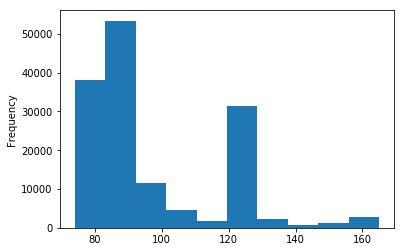

In [30]:
Low = subject2.loc[subject2['Intensity'] == 'low']
Low['heart_rate'].plot(kind='hist')

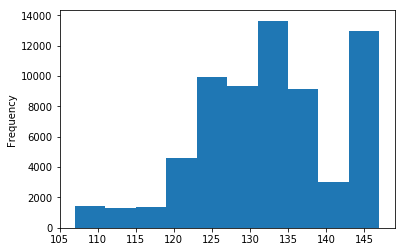

In [31]:
#Low1 = subject1.loc[subjects['Intensity'] == 'low']
Moderate = subject1.loc[subject1['Intensity'] == 'Moderate']
Moderate['heart_rate'].plot(kind='hist')


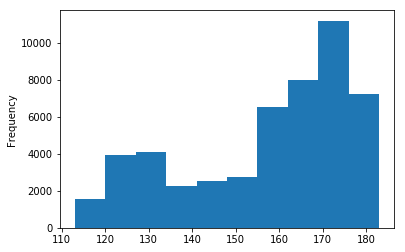

In [32]:
High = subject1.loc[subject1['Intensity'] == 'High']
High['heart_rate'].plot(kind='hist')

In [33]:
#d1 = df.groupby('Key')['admit'].apply(set).to_dict()
df = subject1.groupby("activity_ID")["heart_rate"].mean()

In [34]:
df2 = subject1.groupby(["activity_ID","heart_rate"])

See the increase of heart rate given the different activities

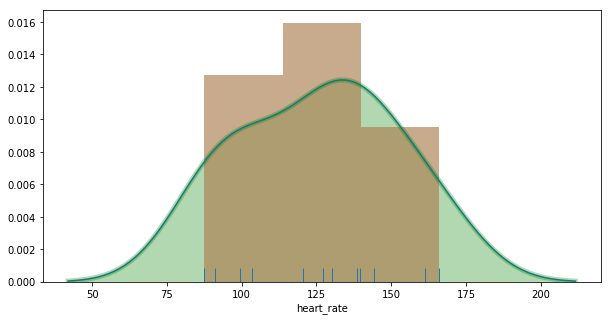

In [35]:
# Hist only heart_rate
plt.figure(figsize = (10,5))
sns.distplot( a=df, hist=True, kde=True, rug=True )

sns.distplot( a=df, kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True }
)

plt.show()



## 5 Hypothesis testing

Before we follow with hypothesis testing we will first do normality check for each of our labeled dataframes to makes sure that the data is normally distributed or not. but before doing that we will conactinate all of our subjects together, to have all the intensivities and their activaties in one dataframe

In [36]:
subjects = pd.concat([subject1,subject2,subject3,subject4,subject5,subject6,subject7,subject8,subject9], ignore_index=True)

In [37]:
Low1 = subjects.loc[subjects['Intensity'] == 'low']
Moderate1 = subjects.loc[subjects['Intensity'] == 'Moderate']
High1 = subjects.loc[subjects['Intensity'] == 'High']


In [38]:
stats.normaltest(Low1['heart_rate'])

NormaltestResult(statistic=158425.94604151056, pvalue=0.0)

In [39]:
stats.normaltest(Moderate1['heart_rate'])

NormaltestResult(statistic=28375.516235863804, pvalue=0.0)

In [40]:
stats.normaltest(High1['heart_rate'])

NormaltestResult(statistic=13699.249418846282, pvalue=0.0)

Both tests return small associated p-values (less than - 0.05 ). This indicates that both distributions deviate from normality. Therefore, we should use Mann-Whitney U test.

In [41]:
LowMean = Low1["heart_rate"].mean()
ModerateMean = Moderate1["heart_rate"].mean()
HighMean = High1["heart_rate"].mean()


Now lets see if there is any corralation between the 3 labeled dataframes when it come sto the mean of the 'heart_rate'.

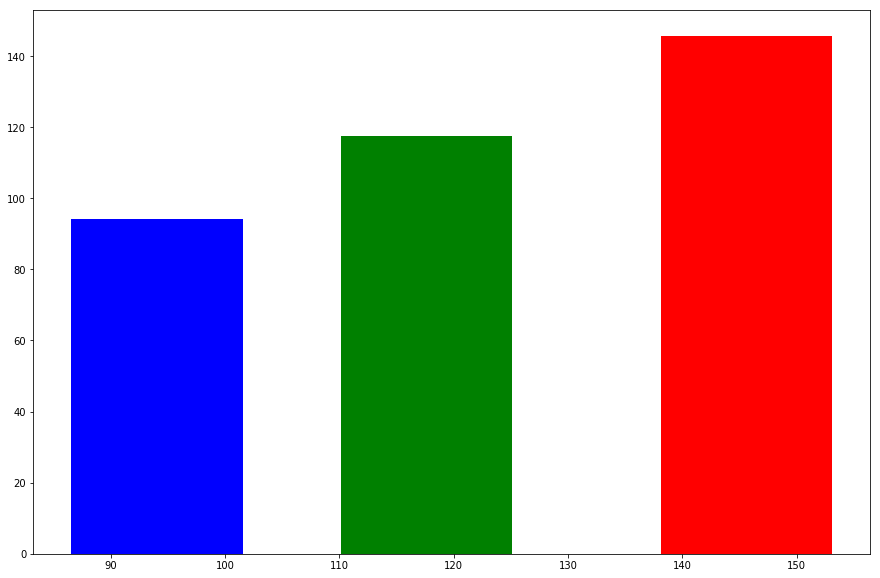

In [42]:
plt.figure(figsize = (15,10))
ax = plt.subplot(111)
ax.bar(LowMean, height = LowMean, width=15, color='b', align='center')
ax.bar(ModerateMean, height = ModerateMean, width=15, color='g', align='center')
ax.bar(HighMean, height = HighMean, width=15, color='r', align='center')

plt.show()

Judging from the plot above, visually it seems that the 'heart_rate' is dependent upon the intensity of those activities. but to prove this, we will run hypothesis testing to define that.

Perform 3 hypothesis testing to observe if the differences between the mean 'heart_rate' of activities labeled as 'low', 'moderate' and 'high' is significantly big to prove that the all 3 of these labels directly affect the fluctuation of the heart rate.


The 3-hypothesis testing are as followed:

* Low intensity heart rate vs Moderate intensity heart rate
* Moderate intensity heart rate vs High intensity heart rate
* Low intensity heart rate vs High intensity heart rate


The Hypothesis for each test:

* Null hypothesis: there is no significant difference between the labeled data of two intensities 
*	Ha: the alternative hypothesis is that there is significant difference, μ1 - μ2 > 0
*	Significance value α: 0.05


##### Low intesivity heart rate vs Moderate intensivity heart rate

In [43]:
Low_vs_Moderate = stats.mannwhitneyu(Low1['heart_rate'],Moderate1['heart_rate'],alternative='two-sided')
print(Low_vs_Moderate)

MannwhitneyuResult(statistic=100227004620.0, pvalue=0.0)


##### Moderate intensivity heart rate vs High intensity heart rate

In [44]:
Moderate_vs_High = stats.mannwhitneyu(Moderate1['heart_rate'],High1['heart_rate'],alternative='two-sided')
print(Moderate_vs_High)

MannwhitneyuResult(statistic=27003856675.0, pvalue=0.0)


##### Low intesivity heart rate vs High intensity heart rate

In [45]:
Low_vs_High = stats.mannwhitneyu(Low1['heart_rate'],High1['heart_rate'],alternative='two-sided')
print(Low_vs_High)

MannwhitneyuResult(statistic=20839206850.5, pvalue=0.0)


### 5.1 Final observations

For each of the Hypothesis the 'p' value is really small '0.0' it is slower than our significance value. Therefore, we chose the alternative hypothesis and presume it as our final prove, which means that the labels of the intensity define the correct metric for defining how intensive the activities are.

In the following paragraphs will try to get insight from our data by fitting it into our models.


## 6 Modeling

We know so far that the data is very sparse and there is no direct correlation between them except the type of activities performed and effect of those activities on the heart rate. and to prove this we will train our model and fit in the data to see on how all of these attributes affect based on the single variable 'heart rate'.

### 6.1 Regression model


As we fit regression models, you might need to make a choice between linear and nonlinear regression models.Despite their names, both forms of regression can fit curvature in our data. So, how do you choose? 

First off, let’s cover a few basics. If the two types of regression models are not named based on their ability to fit curves, what is the difference between them?

linear models must follow one very particular form:

<center>Dependent variable = constant + parameter * IV + … + parameter * IV</center>

The form is linear in the parameters because all terms are either the constant or a parameter multiplied by an independent variable (IV). A linear regression equation simply sums the terms. While the model must be linear in the parameters, you can raise an independent variable by an exponent to fit a curve. For instance, we can use the 'heart rate' as it incresase or decreases along with the other values.

Nonlinear regression models are anything that doesn’t follow this one form.


### 6.2 Creating and fiting our model


As we know, our data is gathered from 3 sensors. Therefore, I will divide our data back to 3 variables to train on 3 different models using one independent  variable 'heart rate'.

Now columns such as 'timestamp', 'activity_ID' and 'Intensity' do not mater in this case we will drop them so that it does not affect our model 

In [46]:
subjects = subjects.drop(['timestamp', 'activity_ID','Intensity'], axis=1)

In [47]:
df1 = subjects.loc[:, 'IMU_hand_temp':'hand_magnetometer_μT_12':1]
df2 = subjects.loc[:, 'IMU_chest_temp':'chest_magnetometer_μT_12':1]
df3 = subjects.loc[:, 'IMU_ankle_temp':'ankle_magnetometer_μT_12':1]

##### Model 1  Hand 

In [48]:
# generate random data-set
np.random.seed(0)
x = df1
y = subjects["heart_rate"]

#x= x.values.reshape(-1, 1)
#y= y.values.reshape(-1, 1)

#x.shape[0] != y.shape[0]
# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)



Slope: [-5.37064533 -0.50880666 -0.09348247 -1.33726289  0.18639004  1.42313131
 -0.2752906   0.26580939 -0.17365683 -0.13841734]
Intercept: 274.5378817549546
Root mean squared error:  498.2107065101733
R2 score:  0.31625521784258237


##### Model 2 Chest

In [49]:
# generate random data-set
np.random.seed(0)
x = df2
y = subjects["heart_rate"]

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)



Slope: [-3.57014672  0.98538946 -0.10864394 -0.49844212 -0.35750626 -0.33218225
 -1.25201191  0.21130433 -0.61511821  0.45092494]
Intercept: 214.59656577319151
Root mean squared error:  466.5201022094356
R2 score:  0.3597474291718512


##### Model 3 Ankle

In [50]:
# generate random data-set
np.random.seed(0)
x = df3
y = subjects["heart_rate"]

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [-2.74849415  0.85952429  0.50450718 -0.09605181 -0.39169974 -0.59850611
 -0.08418255 -0.38608463 -0.25765574 -0.1237781 ]
Intercept: 182.16813754932798
Root mean squared error:  556.6037271578155
R2 score:  0.2361165884223002


#### All the IMU data together 

In [51]:
#all the sensors combined
dfa = subjects.loc[:, subjects.columns != 'heart_rate']

In [52]:
# generate random data-set
np.random.seed(0)
x = dfa
y = subjects["heart_rate"]


# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-6.119711   -0.03367702 -0.02535556 -0.83593565  0.1316111   1.32555891
 -0.24030528  0.05567904 -0.00629127  0.01004668  1.98444507  0.47914175
 -0.17456994 -0.43659559 -0.23352532 -1.07298219 -0.75691079  0.16647117
 -0.4245068   0.25086651  0.42657915  0.24593283  0.14680438 -0.37058594
 -0.40724076 -0.53204515  0.04177617 -0.1227824  -0.01617676 -0.03256917]
Intercept: 202.7591227021196
Root mean squared error:  386.6079381550761
R2 score:  0.46941894864964495


#### 6.3 Discussion

The model did not perform as expected the error value is very low as it has returned accuracy of 23% for the 'Ankle' sensory data, 31.6% for the 'Hand' and 36% for the 'Chest'. However, when fitting the 3 of those data in one. the accuracy is 47% this still not a valid accuracy to consider. However, it is clear that which one of those models performed better which is the data from 'Chest' IMU sensors.

One possible improvement would be to change the model as it seems that the data is not fitted for linear evaluation with the example of Linear regression.


### 7 Summary

Since all the 3 sensors together have given the highest accuracy it is still not a reason to use all 3 for activity trucking. Therefore, use only hand or chest.

Given all the insight gathered for this project, it would be reasonable to advise to use only one sensor given that the IMU sensor of 'Chest' has shown better results and performs relatively well.

Therefore, I would suggest a Sport wearable bra for men and woman, this kind of sensor can define their activities based on their acceleration and the heart rate. Another suggestion would be to truck the persons activities to understand the average MET metric to define the right activities performed by the user as it may differ per person so that it would lead to more definite results when performing activities.


### References

[1]UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set
http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

[2]Metabolic equivalents (METS) in exercise testing, exercise prescription, and evaluation of functional capacity. - PubMed - NCBI
https://www.ncbi.nlm.nih.gov/pubmed/2204507